# Example: Simulating a thermal network model stored in the extended 3DCityDB

This example shows how to extract the information about a thermal network stored in the 3DCityDB and create a simulation model for [pandathermal](https://github.com/IntegrCiTy/PandaThermal) from it.

## Connecting to the database

Define connection parameters.

In [1]:
from dblayer import *

connect = PostgreSQLConnectionInfo(
    user = 'postgres',
    pwd = 'postgres',
    host = 'localhost',
    port = '5432',
    dbname = 'testdb'
    )

Create an instance of class `PandaThermalModelDBReader`.

In [2]:
from dblayer.sim.pandathermal import *

pth_reader = PandaThermalModelDBReader( connect )

## Creating the simulation model

Retrieve the simulation model.

In [3]:
net = pth_reader.get_net( network_id=2000 )

Inspect the nodes of the simulation models, i.e., the thermal sources, sinks and pipe junctions.

In [4]:
list( net.nodes )

['source-SRC',
 'sink-SNK1',
 'sink-SNK2',
 'sink-SNK3',
 'sink-SNK4',
 'sink-SNK5',
 'sink-SNK6',
 'sink-SNK7',
 'sink-SNK8',
 'sink-SNK9',
 'node-N0',
 'node-N1',
 'node-N2',
 'node-N3',
 'node-N4',
 'node-N5',
 'node-N6']

Inspect the edges of the simulation model, i.e., the pipes.

In [5]:
list( net.edges )

[('source-SRC', 'node-N0'),
 ('node-N0', 'sink-SNK1'),
 ('node-N0', 'node-N1'),
 ('node-N1', 'sink-SNK2'),
 ('node-N1', 'node-N2'),
 ('node-N2', 'sink-SNK3'),
 ('node-N2', 'sink-SNK4'),
 ('node-N2', 'sink-SNK5'),
 ('node-N2', 'node-N3'),
 ('node-N3', 'sink-SNK6'),
 ('node-N3', 'node-N4'),
 ('node-N4', 'sink-SNK7'),
 ('node-N4', 'node-N5'),
 ('node-N5', 'sink-SNK8'),
 ('node-N5', 'node-N6'),
 ('node-N6', 'sink-SNK9')]

## Using the simulation model

Calculate the maximal mass flows.

In [6]:
pipes_max_m_dot = pth.compute_pipes_max_m_dot( net, dt=40 )

Plot the results from the mass flow calculations. 

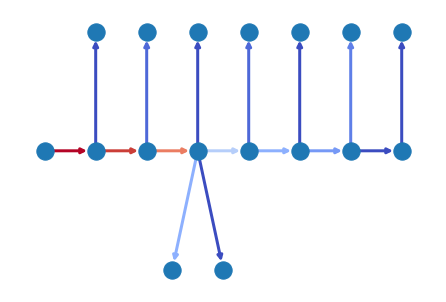

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

thermal_nodes = pth_reader.sources + pth_reader.sinks + pth_reader.junctions
thermal_nodes_pos = { n.name: pth_reader.geom_to_point2d( n.geom ).list() for n in thermal_nodes }

nx.draw( net, thermal_nodes_pos, edge_color=list( pipes_max_m_dot.values() ), edge_cmap=plt.cm.coolwarm, width=3 )

plt.show()

Done.